# Team Model Comparison: Across Data Preprocessing Pipelines

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')

`load team f1 scores`

In [74]:
DATA_PATH = '../data/processed/'
FILE_NAME = 'team_f1_scores.csv'

df = pd.read_csv(DATA_PATH+FILE_NAME)

In [75]:
df

,Impute,Imbalance strategy,Simplify location,F1(Random Forest),F1(FFNN)
0,yes,none,no,0.2800,0.2500
1,yes,none,yes,0.2500,0.2500
2,yes,undersampling,no,0.2200,0.2300
3,yes,SMOTENC (sampled),no,0.4436,0.3797
4,yes,SMOTENC (all),no,0.3300,0.2800
5,yes,class weights,no,0.5200,0.4900
6,yes,SMOTENC (sampled),yes,0.3000,0.2600
7,no,SMOTENC (sampled),yes,0.3000,0.2500


`prepare data for heatmap`

In [76]:
df.columns = df.columns.str.strip()
df["Pipeline"] = (
    "Impute=" + df["Impute"].astype(str) +
    ", Imb=" + df["Imbalance strategy"].astype(str) +
    ", Loc=" + df["Simplify location"].astype(str)
)


In [77]:
# select only Pipeline and F1 scores columns
cols = ['Pipeline', 'F1(Random Forest)', 'F1(FFNN)']
f1_df = df[cols]
f1_df

,Pipeline,F1(Random Forest),F1(FFNN)
0,"Impute=yes, Imb=none, Loc=no",0.2800,0.2500
1,"Impute=yes, Imb=none, Loc=yes",0.2500,0.2500
2,"Impute=yes, Imb=undersampling, Loc=no",0.2200,0.2300
3,"Impute=yes, Imb=SMOTENC (sampled), Loc=no",0.4436,0.3797
4,"Impute=yes, Imb=SMOTENC (all), Loc=no",0.3300,0.2800
5,"Impute=yes, Imb=class weights, Loc=no",0.5200,0.4900
6,"Impute=yes, Imb=SMOTENC (sampled), Loc=yes",0.3000,0.2600
7,"Impute=no, Imb=SMOTENC (sampled), Loc=yes",0.3000,0.2500


In [78]:
# set Pipeline as index
f1_df = f1_df.set_index("Pipeline") 

`create heatmap`

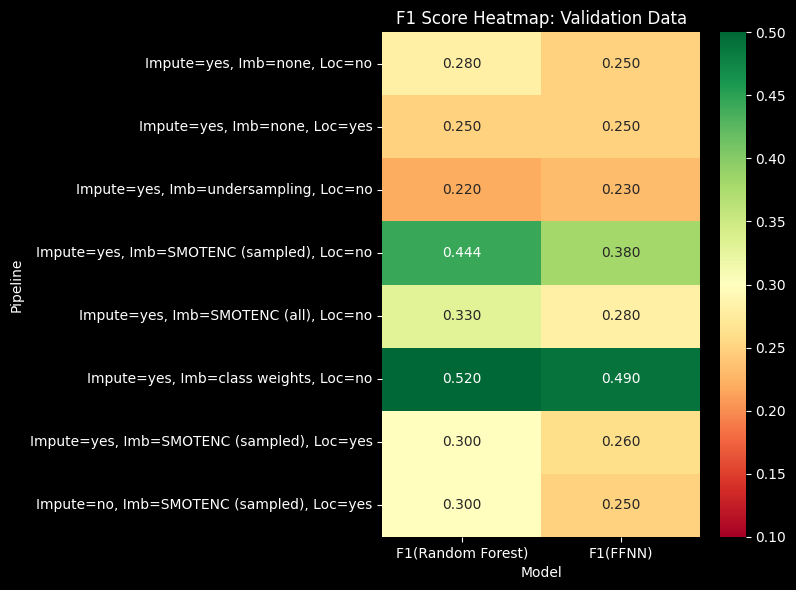

In [79]:
# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(f1_df, annot=True, cmap="RdYlGn", vmin=0.1, vmax=0.5, fmt=".3f")
plt.title("F1 Score Heatmap: Validation Data")
plt.xlabel("Model")
plt.ylabel("Pipeline")
plt.tight_layout()
plt.savefig('../reports/f1_scores_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()